In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer.pitch import Pitch
import requests
from bs4 import BeautifulSoup

Text(0.5, 0.55, '1-1')

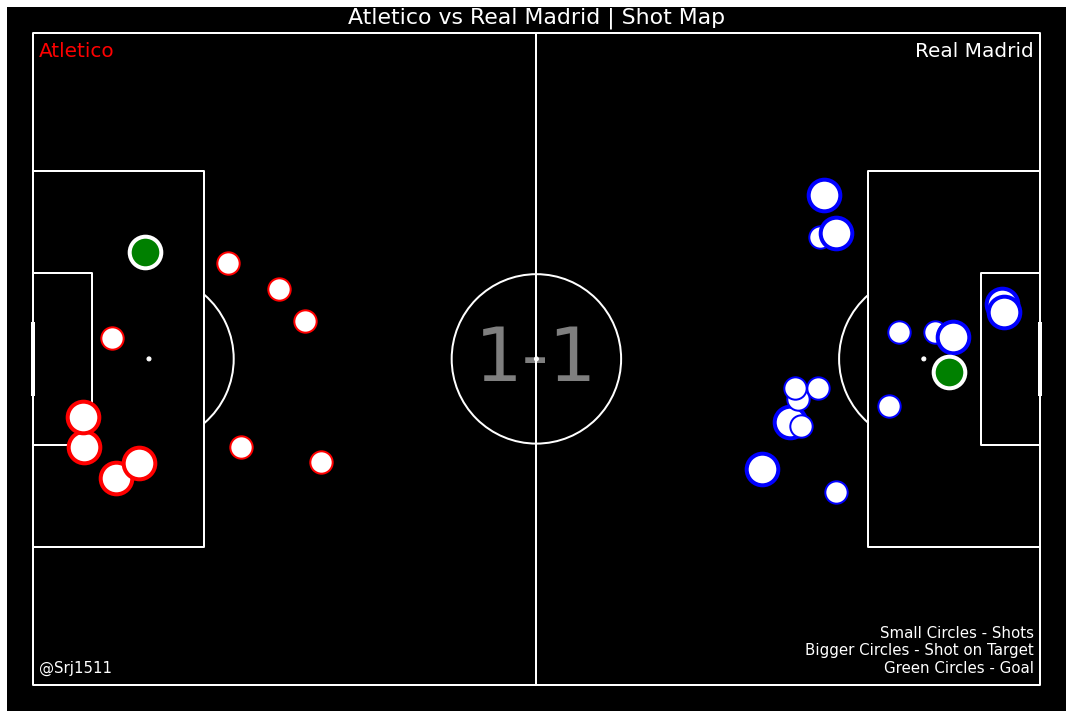

In [9]:
with open (DATA_PATH) as f:
    data = json.load(f)

pitch = Pitch(pitch_type='opta', pitch_color="black", line_color='white', stripe=False,
             constrained_layout=False, tight_layout=True)
(fig, ax) = pitch.draw(figsize=(15, 11))

home_side = data['home']['name']
away_side = data['away']['name']

header = home_side + ' vs ' + away_side + ' | Shot Map'
score = data['score'].split(' ')[0] + '-' + data['score'].split(' ')[2]

for i in data['events']:
    if 'isShot' in i.keys() and i['isShot'] == True:
        if i['teamId'] == data['home']['teamId']:
            if 'isGoal' in i.keys() and i['isGoal'] == True:
                node = plt.scatter(100-i['x'], 100-i['y'], s=1000, color='green', edgecolors="white", 
                               alpha=1, zorder=3, linewidth=4) 
            elif 8 in i['satisfiedEventsTypes']:
                node = plt.scatter(100-i['x'], 100-i['y'], s=1000, color='white', edgecolors="red", 
                               alpha=1, zorder=3, linewidth=4)
            else:
                node = plt.scatter(100-i['x'], 100-i['y'], s=500, color='white', edgecolors="red", 
                               alpha=1, zorder=3, linewidth=2)
            
for i in data['events']:
    if 'isShot' in i.keys() and i['isShot'] == True:
        if i['teamId'] == data['away']['teamId']:
            if 'isGoal' in i.keys() and i['isGoal'] == True:
                node = plt.scatter(i['x'], i['y'], s=1000, color='green', edgecolors="white", 
                               alpha=1, zorder=3, linewidth=4) 
            elif 8 in i['satisfiedEventsTypes']:
                node = plt.scatter(i['x'], i['y'], s=1000, color='#FFFFFF', edgecolors="blue", 
                               alpha=1, zorder=3, linewidth=4)
            else:
                node = plt.scatter(i['x'], i['y'], s=500, color='#FFFFFF', edgecolors="blue", 
                               alpha=1, zorder=3, linewidth=2)
           
ax.text(0.5, 1, header,
        verticalalignment='top', horizontalalignment='center',
        transform=ax.transAxes,
        color='white', fontsize=22)

ax.text(0.03, 0.95, home_side,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='red', fontsize=20)

ax.text(0.97, 0.95, away_side,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='white', fontsize=20)

ax.text(0.97, 0.05, 'Small Circles - Shots\nBigger Circles - Shot on Target\nGreen Circles - Goal',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='white', fontsize=15)

ax.text(0.03, 0.05, '@Srj1511',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='white', fontsize=15)

ax.text(0.50, 0.55, score,
        verticalalignment='top', horizontalalignment='center',
        transform=ax.transAxes,
        color='white', fontsize=75, alpha=0.5)

# ax.text(0.50, 0.38, '(0.57)-(1.89)',
#         verticalalignment='top', horizontalalignment='center',
#         transform=ax.transAxes,
#         color='white', fontsize=20, alpha=0.5)